### Numerical Heuristic

1. Find an initial primal feasible (basic) flow using the northwest corner method. 
    - If all demands are satisfied, we have a basic feasible solution to the primal.
1. Compute dual variables that satisfy the condition $[c_{ij}+V_i-W_j]X_{ij}=0 \quad\forall i\in I;j\in J$
    - Let $V_i=0$: Select any single dual variable and set it to zero arbitrarily.
    - Identify $V_i$ and $W_j$ to satisfy $c_{ij}+V_i-W_j=0$ if $X_{ij}$ is a basic variable.  
1. Check dual feasibility: If $c_{ij}+V_i-W_j\ge 0$, the solution is optimal, otherwise, revise the primal solution.
    - For the $i,j$ pair for which $c_{ij}+V_i-W_j\le 0$, find the minimum amount by which the flow may be increased while maintaining a basic feasible primal solution. Then, go to Step 2.
    

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from NTP import NTP, gen_data

In [2]:
%%capture
# import data
i_data, j_data, dist_ij = gen_data(
        size=(3, 4),
        supply_min=80,
        supply_max=150,
        coord_bound=10
    )

In [3]:
# declare the parameters and sets
S = i_data['Supply'].values
D = j_data['Demand'].values

cost = 1
costs = dist_ij * cost

In [4]:
# solve the heuristic
p = NTP(costs, S, D)
p.solve()

Objective value = 3051
Terminated in 2 iterations


Initialize


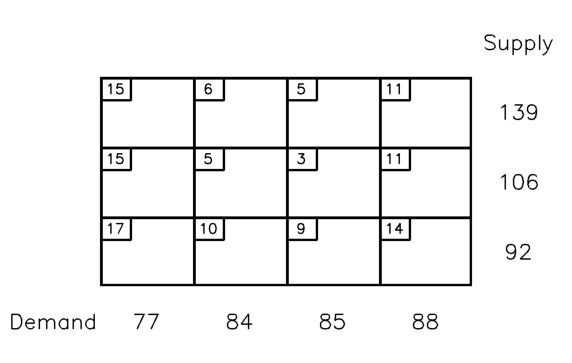

Northwest method


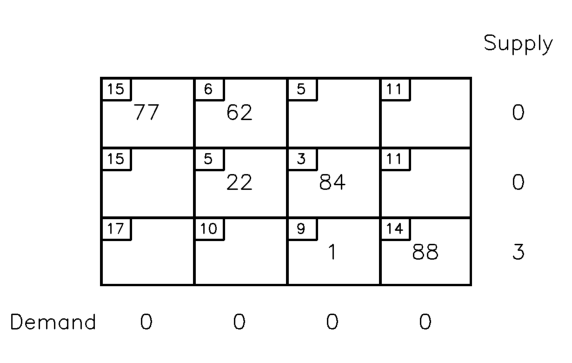

Solve for Vs and Ws


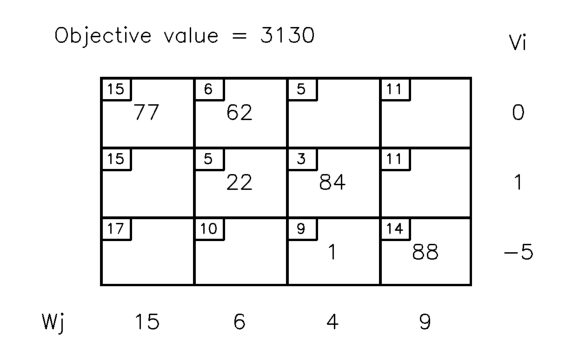

Calculate the slack values and find the lowest slack variable.


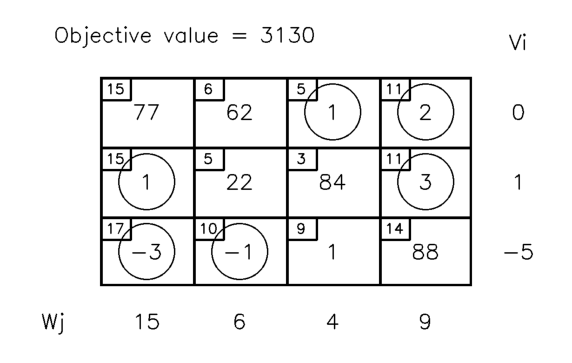

Find the optimal path starting from the lowest slack variable.


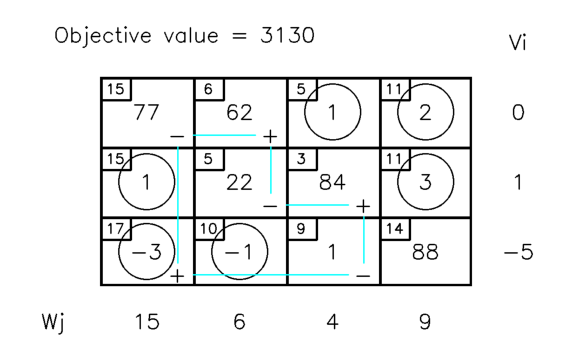

Find the smallest basic variable and then add and subtract it across the path.


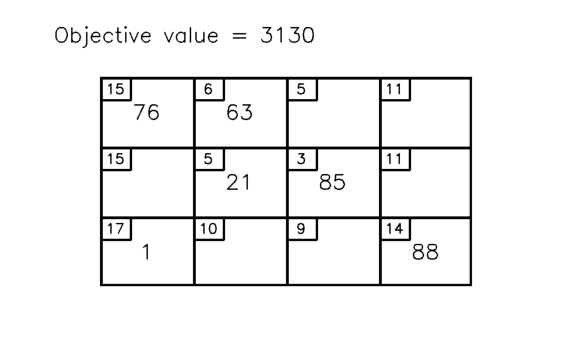

Solve for Vs and Ws


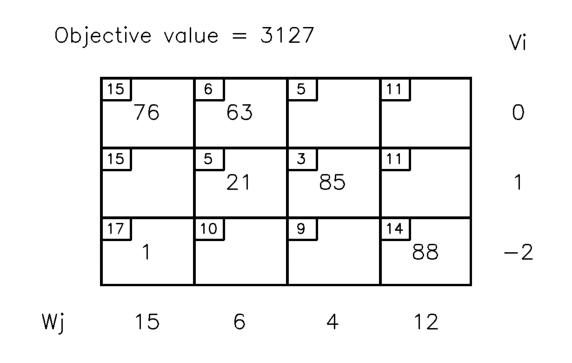

Calculate the slack values and find the lowest slack variable.


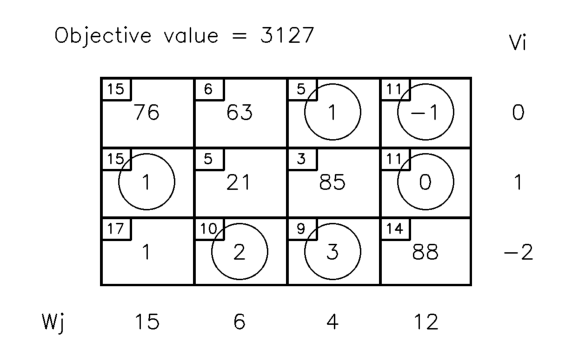

Find the optimal path starting from the lowest slack variable.


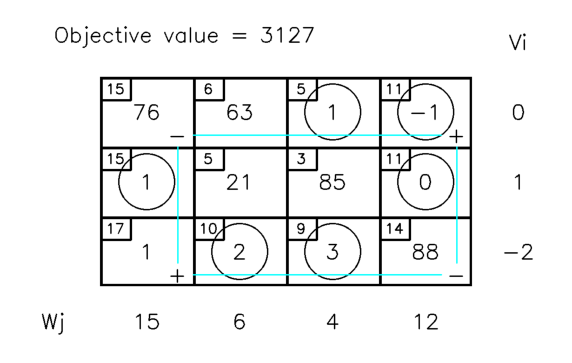

Find the smallest basic variable and then add and subtract it across the path.


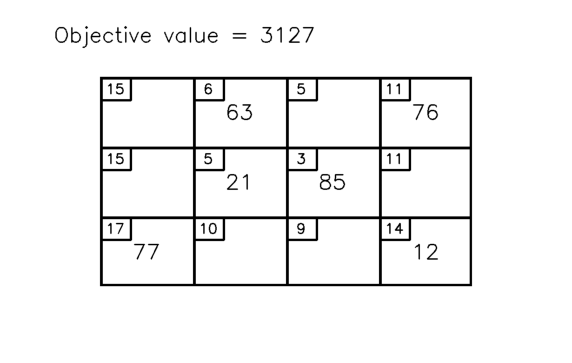

Solve for Vs and Ws


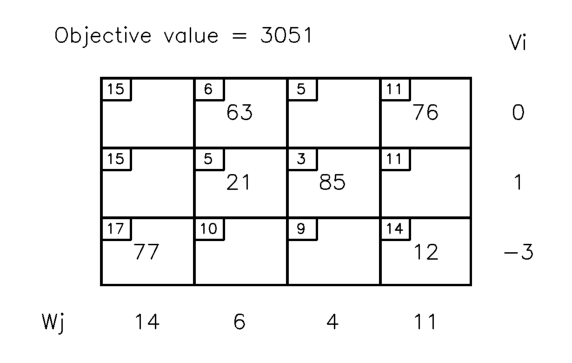

Calculate the slack values and find the lowest slack variable.


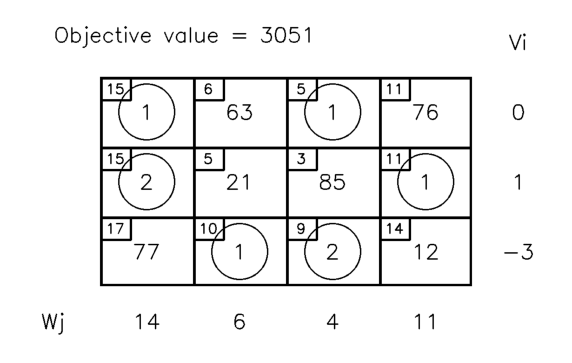

In [5]:
for step in p.steps:
    fig, ax = plt.subplots(figsize=(10,10))
    plt.imshow(step['img'])
    plt.axis('off')
    print(step['text'])
    plt.show()

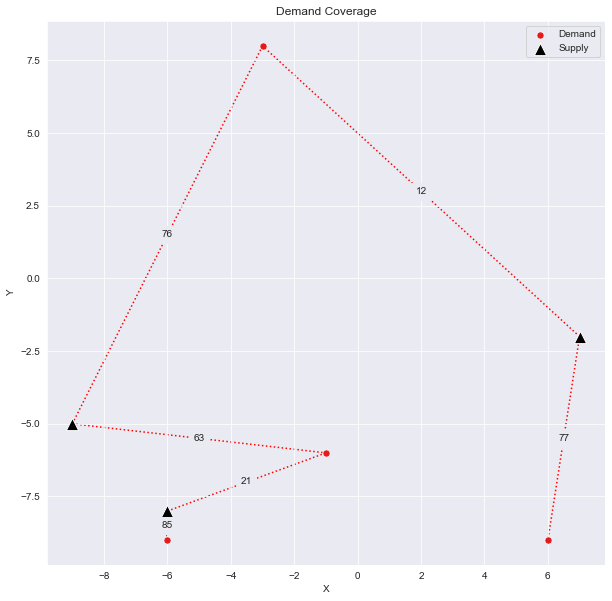

In [6]:
p.plot(i_data, j_data)